## Import packages

In [8]:
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import os
import subprocess
%matplotlib inline

## Read data

In [9]:
filename="header.pkl"
if os.path.isfile(filename):
    print(filename+" exists.")
else: 
    url = 'https://filedn.com/lEzjnrJwSG47nSDwzIitUuf'
    folder='/Data/swi_python/'
    command = ['wget', url+folder+filename]
    subprocess.run(command)

header = pd.read_pickle(filename)
header

--2024-09-25 14:06:30--  https://filedn.com/lEzjnrJwSG47nSDwzIitUuf/Data/swi_python/header.pkl
Resolving filedn.com (filedn.com)... 74.120.9.25
Connecting to filedn.com (filedn.com)|74.120.9.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 481536327 (459M) [application/octet-stream]
Saving to: ‘header.pkl’

     0K .......... .......... .......... .......... ..........  0%  428K 18m20s
    50K .......... .......... .......... .......... ..........  0%  481K 17m18s
   100K .......... .......... .......... .......... ..........  0%  487K 16m54s
   150K .......... .......... .......... .......... ..........  0%  461K 16m55s
   200K .......... .......... .......... .......... ..........  0%  493K 16m43s
   250K .......... .......... .......... .......... ..........  0%  517K 16m27s
   300K .......... .......... .......... .......... ..........  0%  636K 15m52s
   350K .......... .......... .......... .......... ..........  0%  617K 15m28s
   400K .......... ....

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2
0,1,1,9,1,1,23,0,12,0,1,...,0,1,0,0,0,0,0,0,0,0
1,2,2,9,2,1,24,0,12,0,1,...,0,2,0,0,0,0,0,0,0,0
2,3,3,9,3,1,25,0,12,0,1,...,0,3,0,0,0,0,0,0,0,0
3,4,4,9,4,1,26,0,12,0,1,...,0,4,0,0,0,0,0,0,0,0
4,5,5,9,5,1,27,0,12,0,1,...,0,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566873,10252258,3566874,3437,1204,3645,216988,0,12,0,1,...,0,7968,0,0,0,0,0,0,0,0
3566874,10252259,3566875,3437,1205,3645,216989,0,12,0,1,...,0,7969,0,0,0,0,0,0,0,0
3566875,10252260,3566876,3437,1206,3645,216990,0,12,0,1,...,0,7970,0,0,0,0,0,0,0,0
3566876,10252261,3566877,3437,1207,3645,216991,0,12,0,1,...,0,7971,0,0,0,0,0,0,0,0


## Plot receivers

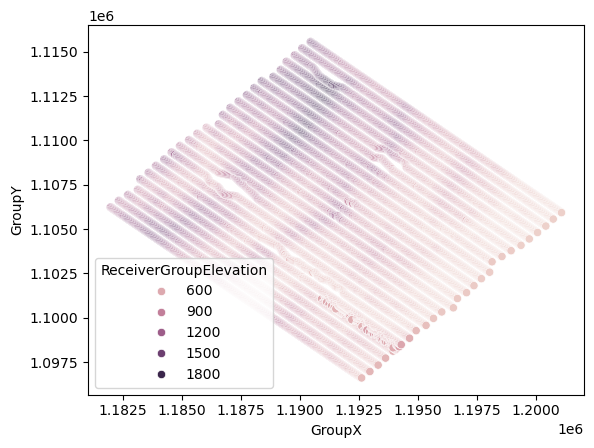

In [10]:
rec_pos_ele=header.drop_duplicates(subset=['GroupX','GroupY'])
sns.scatterplot(data=rec_pos_ele, x="GroupX", y="GroupY", hue="ReceiverGroupElevation")
plt.show()

## RBF interpolation

In [11]:
x=rec_pos_ele['GroupX'].to_numpy().astype('f')
y=rec_pos_ele['GroupY'].to_numpy().astype('f')
z=rec_pos_ele['ReceiverGroupElevation'].to_numpy().astype('f')
xmin=rec_pos_ele['GroupX'].min()
xmax=rec_pos_ele['GroupX'].max()
ymin=rec_pos_ele['GroupY'].min()
ymax=rec_pos_ele['GroupY'].max()
tx = np.linspace(xmin, xmax, 100)
ty = np.linspace(ymin, ymax, 100)
XI, YI = np.meshgrid(tx, ty)
#Creating the interpolation function and populating the output matrix value
from scipy.interpolate import Rbf
rbf = Rbf(x, y, z, function='linear')
ZI = rbf(XI, YI)

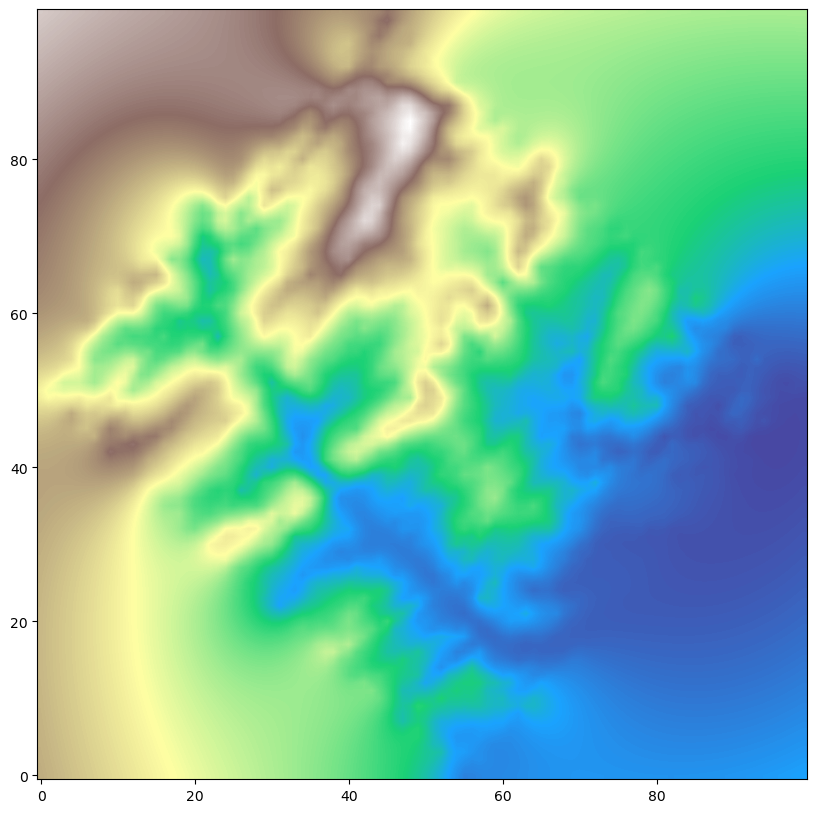

In [12]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(ZI, cmap=plt.cm.terrain, alpha=.9, interpolation='bilinear', origin='lower')
#plt.colorbar()
plt.show()

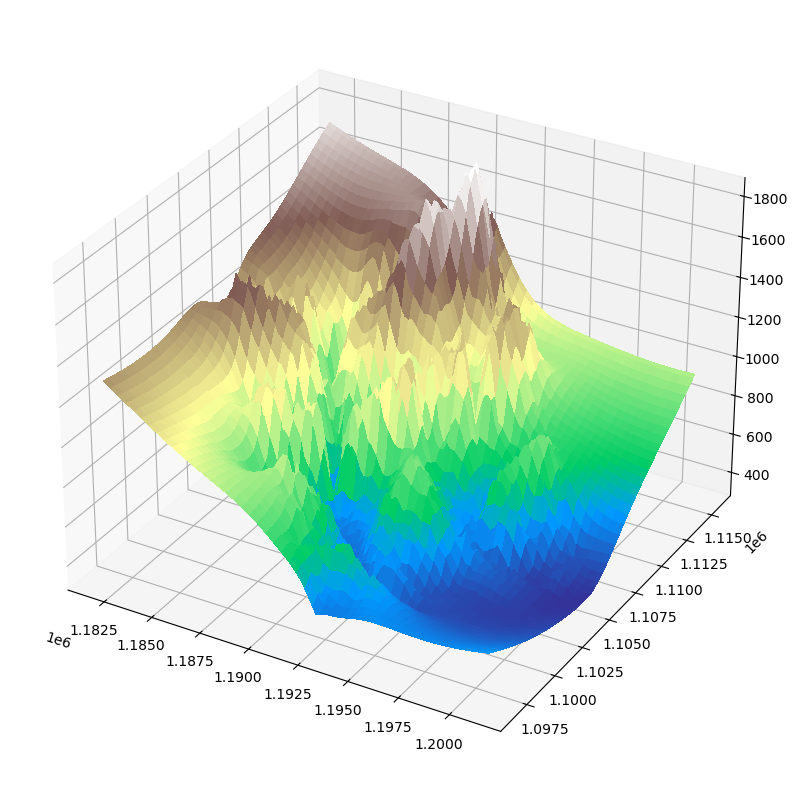

In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting tools

# Create a new figure
fig = plt.figure()

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# Plot your surface (example with sample variables)
surf = ax.plot_surface(XI, YI, ZI, cmap=cm.terrain, linewidth=0, antialiased=False)

# Show the plot
plt.show()


## Rotación de las coordenadas 

In [14]:
import math as mt
GroupX=rec_pos_ele['GroupX'].to_numpy()
GroupY=rec_pos_ele['GroupY'].to_numpy()
ind2=np.where(GroupY==GroupY.max())
ind1=np.where(GroupX==GroupX.max())
theta=mt.atan((GroupY[ind1]-GroupY[ind2])/(GroupX[ind1]-GroupX[ind2]))
theta

/tmp/ipykernel_364096/3681341441.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta=mt.atan((GroupY[ind1]-GroupY[ind2])/(GroupX[ind1]-GroupX[ind2]))


-0.7361218000758647

In [15]:
header['ReceiverX']=header['GroupX']*mt.cos(theta)+header['GroupY']*mt.sin(theta)
header['ReceiverY']=-header['GroupX']*mt.sin(theta)+header['GroupY']*mt.cos(theta)
header['SourceX_new']=header['SourceX']*mt.cos(theta)+header['SourceY']*mt.sin(theta)
header['SourceY_new']=-header['SourceX']*mt.sin(theta)+header['SourceY']*mt.cos(theta)
header

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new
0,1,1,9,1,1,23,0,12,0,1,...,0,0,0,0,0,0,133195.117308,1.613410e+06,133695.147082,1.613429e+06
1,2,2,9,2,1,24,0,12,0,1,...,0,0,0,0,0,0,133243.281522,1.613410e+06,133695.147082,1.613429e+06
2,3,3,9,3,1,25,0,12,0,1,...,0,0,0,0,0,0,133290.704658,1.613410e+06,133695.147082,1.613429e+06
3,4,4,9,4,1,26,0,12,0,1,...,0,0,0,0,0,0,133338.868872,1.613411e+06,133695.147082,1.613429e+06
4,5,5,9,5,1,27,0,12,0,1,...,0,0,0,0,0,0,133386.292008,1.613411e+06,133695.147082,1.613429e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566873,10252258,3566874,3437,1204,3645,216988,0,12,0,1,...,0,0,0,0,0,0,147364.797755,1.626009e+06,147626.850767,1.625997e+06
3566874,10252259,3566875,3437,1205,3645,216989,0,12,0,1,...,0,0,0,0,0,0,147412.961969,1.626009e+06,147626.850767,1.625997e+06
3566875,10252260,3566876,3437,1206,3645,216990,0,12,0,1,...,0,0,0,0,0,0,147460.385105,1.626009e+06,147626.850767,1.625997e+06
3566876,10252261,3566877,3437,1207,3645,216991,0,12,0,1,...,0,0,0,0,0,0,147509.220738,1.626009e+06,147626.850767,1.625997e+06


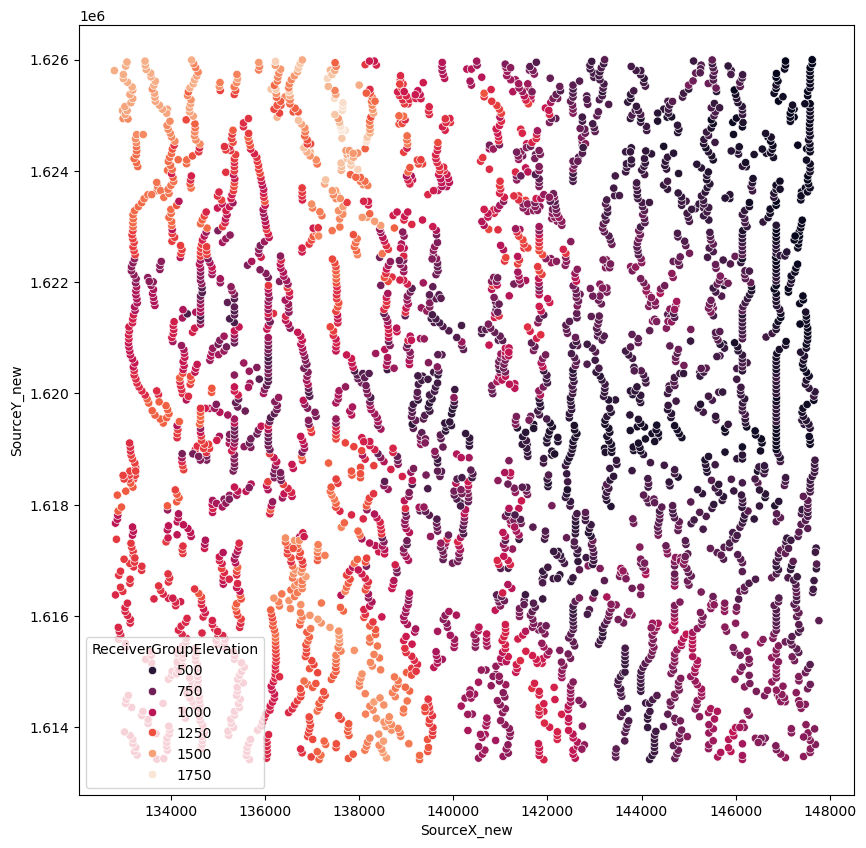

In [16]:
sou_pos_ele=header.drop_duplicates(subset=['SourceX_new','SourceY_new'])
sns.scatterplot(data=sou_pos_ele, x="SourceX_new", y="SourceY_new", hue="ReceiverGroupElevation",palette='rocket')
plt.show()

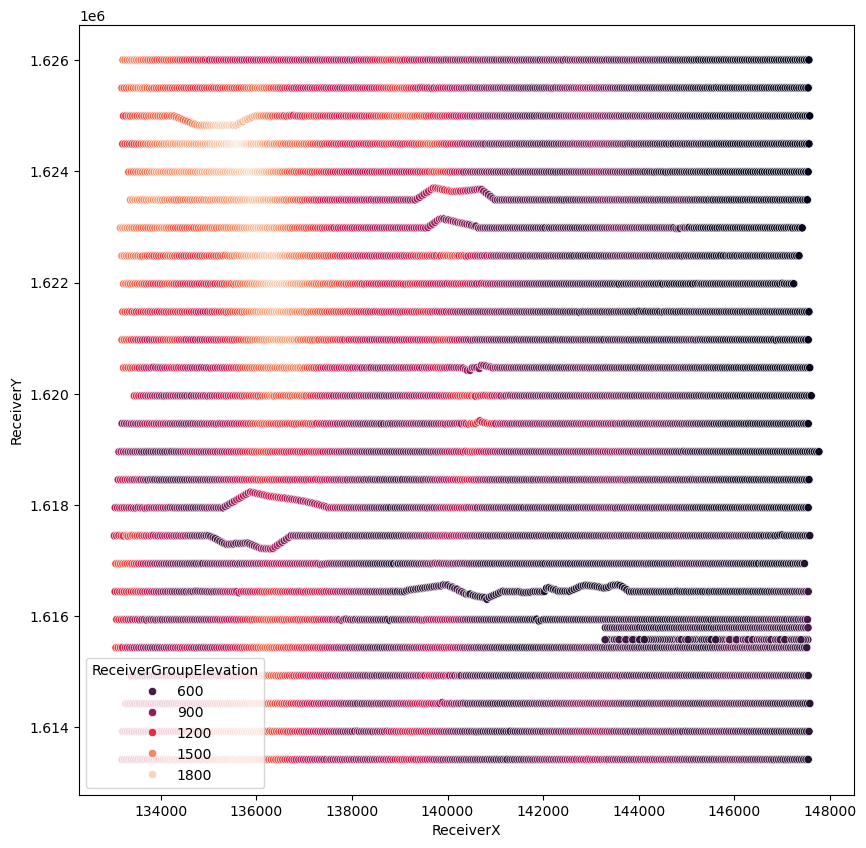

In [17]:
rec_pos_ele=header.drop_duplicates(subset=['ReceiverX','ReceiverY'])
sns.scatterplot(data=rec_pos_ele, x="ReceiverX", y="ReceiverY", hue="ReceiverGroupElevation",palette='rocket')
plt.show()

In [18]:
x=rec_pos_ele['ReceiverX'].to_numpy().astype('f')
y=rec_pos_ele['ReceiverY'].to_numpy().astype('f')
z=rec_pos_ele['ReceiverGroupElevation'].to_numpy().astype('f')
xmin=rec_pos_ele['ReceiverX'].min()
xmax=rec_pos_ele['ReceiverX'].max()
ymin=rec_pos_ele['ReceiverY'].min()
ymax=rec_pos_ele['ReceiverY'].max()
tx = np.linspace(xmin, xmax, 100)
ty = np.linspace(ymin, ymax, 100)
XI, YI = np.meshgrid(tx, ty)
#Creating the interpolation function and populating the output matrix value
from scipy.interpolate import Rbf
rbf = Rbf(x, y, z, function='linear')
ZI = rbf(XI, YI)

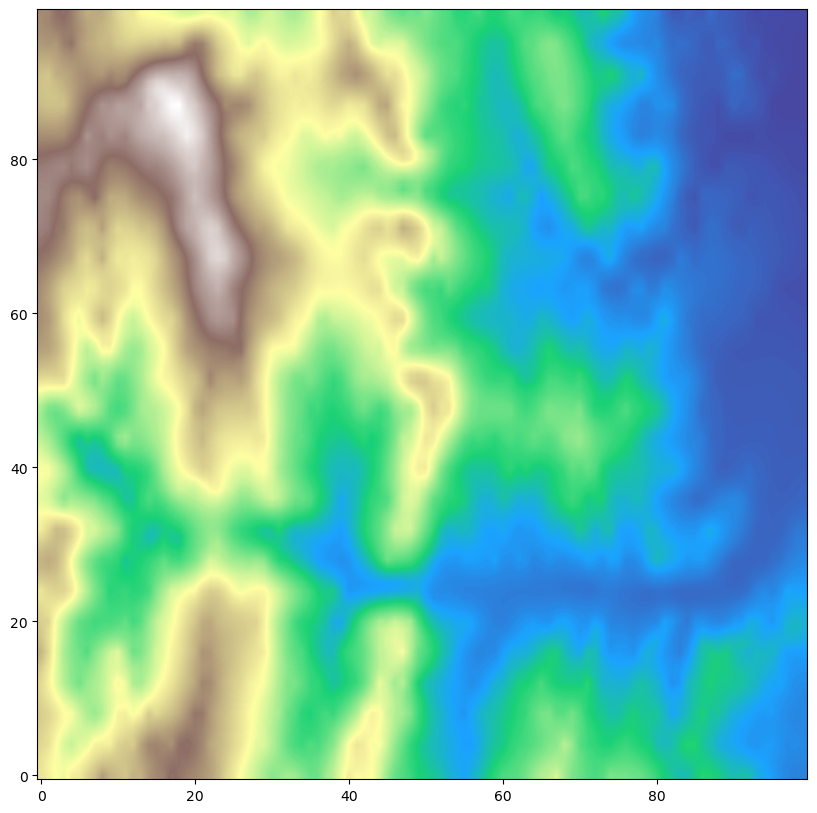

In [19]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(ZI, cmap=plt.cm.terrain, alpha=.9, interpolation='bilinear', origin='lower')
#plt.colorbar()
plt.show()

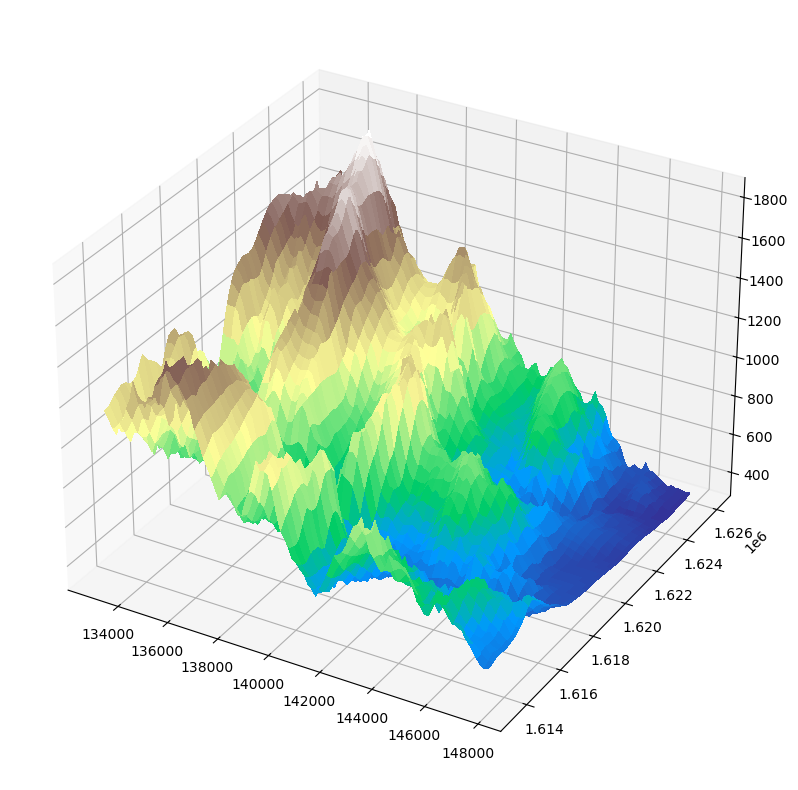

In [20]:
# Create a new figure
fig = plt.figure()

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# Plot your surface (example with sample variables)
surf = ax.plot_surface(XI, YI, ZI, cmap=cm.terrain, linewidth=0, antialiased=False)

# Show the plot
plt.show()

In [21]:
if 0:
    header.to_pickle("header_new.pkl")